In [12]:
# Loading the tidyverse
library(tidyverse)

# Reading in the taxi data
taxi <- read_csv('../input/taxicsv/taxi.csv')

head(taxi)

dim(taxi)



── Column specification ────────────────────────────────────────────────────────
cols(
  medallion = col_character(),
  pickup_datetime = col_datetime(format = ""),
  pickup_longitude = col_double(),
  pickup_latitude = col_double(),
  trip_time_in_secs = col_double(),
  fare_amount = col_double(),
  tip_amount = col_double()
)




medallion,pickup_datetime,pickup_longitude,pickup_latitude,trip_time_in_secs,fare_amount,tip_amount
<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4D24F4D8EF35878595044A52B098DFD2,2013-01-13 10:23:00,-73.94646,40.77273,600,8.0,2.5
A49C37EB966E7B05E69523D1CB7BE303,2013-01-13 04:52:00,-73.99827,40.74041,840,18.0,0.0
1E4B72A8E623888F53A9693C364AC05A,2013-01-13 10:47:00,-73.95346,40.77586,60,3.5,0.7
F7E4E9439C46B8AD5B16AB9F1B3279D7,2013-01-13 11:14:00,-73.98137,40.72473,720,11.5,2.3
A9DC75D59E0EA27E1ED328E8BE8CD828,2013-01-13 11:24:00,-73.96800,40.76000,240,6.5,0.0
19BF1BB516C4E992EA3FBAEDA73D6262,2013-01-13 10:51:00,-73.98502,40.76341,540,8.5,1.7


[1] 49999     7

# Cleaning the taxi data

In [13]:
##  The taxi dataset contains the times and price of a large number of taxi trips.

##  Importantly need to get to know the location, the longitude and latitude, where the trip was started.

##  The taxi dataset needs a bit of polishing before to use it.


## Renaming the location variables                                     -----
## Dropping any journeys with zero fares and zero tips              ----
## Creating the total variable as the log sum of fare and tip    ----         ## All this as part of a single %>%-pipeline.
taxi <- taxi %>%
   rename(long = pickup_longitude, lat = pickup_latitude)  %>% 
   filter(fare_amount > 0 | tip_amount > 0) %>%
   mutate(total = log (fare_amount + tip_amount))    ## Mutate taxi to include a new column called total




## The reason to define total as the the log() of fare_amount + tip_amount is that by taking the log we remedy the effect of outliers by making really large numbers smaller.

In [14]:
head(taxi, 20)
dim(taxi)

medallion,pickup_datetime,long,lat,trip_time_in_secs,fare_amount,tip_amount,total
<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4D24F4D8EF35878595044A52B098DFD2,2013-01-13 10:23:00,-73.94646,40.77273,600,8.0,2.5,2.3513753
A49C37EB966E7B05E69523D1CB7BE303,2013-01-13 04:52:00,-73.99827,40.74041,840,18.0,0.0,2.8903718
1E4B72A8E623888F53A9693C364AC05A,2013-01-13 10:47:00,-73.95346,40.77586,60,3.5,0.7,1.4350845
F7E4E9439C46B8AD5B16AB9F1B3279D7,2013-01-13 11:14:00,-73.98137,40.72473,720,11.5,2.3,2.6246686
A9DC75D59E0EA27E1ED328E8BE8CD828,2013-01-13 11:24:00,-73.96800,40.76000,240,6.5,0.0,1.8718022
19BF1BB516C4E992EA3FBAEDA73D6262,2013-01-13 10:51:00,-73.98502,40.76341,540,8.5,1.7,2.3223877
5F2EFC03B544635C9B0E7A4AA4FF9AC3,2013-01-13 12:53:00,-73.97295,40.79527,0,2.5,0.0,0.9162907
8DEB70907D00AA1D7FF5E2683240549B,2013-01-13 07:59:00,-73.96577,40.76530,120,4.0,0.0,1.3862944
E15F7CCB808DD15E0496D830D3DEDECE,2013-01-13 08:09:00,-73.94768,40.77507,720,14.0,2.0,2.7725887


[1] 49998     8

# Zooming in on Manhattan

In [15]:
###  While the dataset contains taxi trips from all over New York City, the bulk of the trips are to and from Manhattan, so let's focus only on trips initiated there.

### Reducing the data to taxi trips starting in Manhattan
### Manhattan is bounded by the rectangle with 
### ---- = Latitude from 40.70 to 40.83 and 
###  ----- = Longitude from -74.025 to -73.93
taxi <- taxi  %>% 
    filter(between(lat,  40.70, 40.83) &
           between(long, -74.025, -73.93))

In [16]:
dim(taxi)

[1] 45766     8

# Where does the journey begin?

In [17]:
#### Use the  ggmap package together with ggplot2 to visualize where in Manhattan people tend to start their taxi journeys.
#### Drawing a map of Manhattan with a summary of the number of journeys on top.

#### Load in the ggmap package and the viridis package which includes a nice color scale
library(ggmap)
library(viridis)





#### Retrieving a stored map object
manhattan <- readRDS("../input/where-does-the-journey-begin/manhattan.rds")



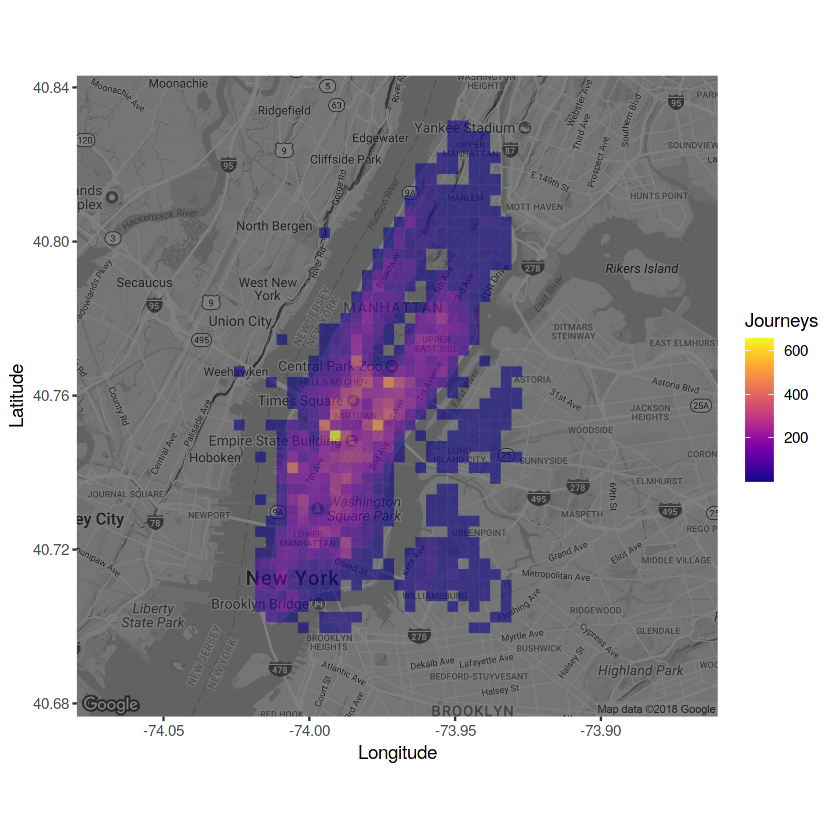

In [18]:

#### Drawing a density map with the number of journey start locations
ggmap(manhattan, darken = 0.5)+               #--> color = "bw"
    scale_fill_viridis(option='plasma') +
    geom_bin2d(data = taxi, aes(x = long, y = lat), bins = 60, alpha = 0.6) +
    labs(x = 'Longitude', y = 'Latitude', fill = 'Journeys')

# Predicting taxi fares using a tree

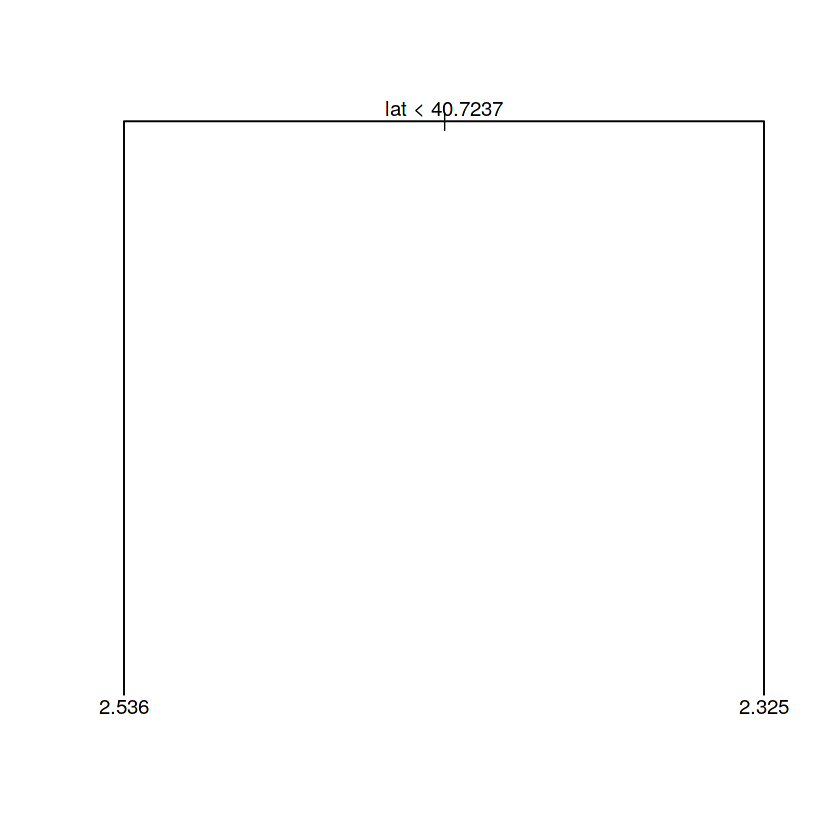

In [19]:
##### The map from the previous task showed that the journeys are highly concentrated in the business and tourist areas.
##### We also see that some taxi trips originating in Brooklyn slipped through, but that's fine.





##### Now we will use a regression tree to predict the total fare with lat and long being the predictors.
##### The tree algorithm will try to find cutpoints in those predictors that results in the decision tree with the best predictive capability.

#####  Loading in the tree package
library(tree)

##### Fitting a tree to lat and long
fitted_tree <- tree(total ~ lat + long, data = taxi)


##### Draw a diagram of the tree structure
plot(fitted_tree)
text(fitted_tree)

In [20]:
summary(fitted_tree)


Regression tree:
tree(formula = total ~ lat + long, data = taxi)
Variables actually used in tree construction:
[1] "lat"
Number of terminal nodes:  2 
Residual mean deviance:  0.3041 = 13910 / 45760 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.61900 -0.37880 -0.04244  0.00000  0.32660  2.69900 

# More predictors.

In [21]:
###### The tree above looks a bit frugal, it only includes one split.
###### It predicts that trips where lat < 40.7237 are more expensive, which makes sense as it is downtown Manhattan. But that's it.
###### It didn't even include long as tree deemed that it didn't improve the predictions. 
######  Take the pickup_datetime column to add the hour, weekday, and month each trip was made.
###### Each new column should be created from the pickup_datetime using either of the functions hour(), wday(), and month().


######  Loading in the lubridate package . Lubridate includes many functions, like hour(), which extract information from a datetime object

library(lubridate)

###### Generate the three new time variables

taxi <- taxi %>% 
    mutate(hour = hour(pickup_datetime),
           wday = wday(pickup_datetime, label = TRUE),
           month = month(pickup_datetime, label = TRUE))


In [22]:
head(taxi)

medallion,pickup_datetime,long,lat,trip_time_in_secs,fare_amount,tip_amount,total,hour,wday,month
<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<ord>,<ord>
4D24F4D8EF35878595044A52B098DFD2,2013-01-13 10:23:00,-73.94646,40.77273,600,8.0,2.5,2.351375,10,Sun,Jan
A49C37EB966E7B05E69523D1CB7BE303,2013-01-13 04:52:00,-73.99827,40.74041,840,18.0,0.0,2.890372,4,Sun,Jan
1E4B72A8E623888F53A9693C364AC05A,2013-01-13 10:47:00,-73.95346,40.77586,60,3.5,0.7,1.435085,10,Sun,Jan
F7E4E9439C46B8AD5B16AB9F1B3279D7,2013-01-13 11:14:00,-73.98137,40.72473,720,11.5,2.3,2.624669,11,Sun,Jan
A9DC75D59E0EA27E1ED328E8BE8CD828,2013-01-13 11:24:00,-73.96800,40.76000,240,6.5,0.0,1.871802,11,Sun,Jan
19BF1BB516C4E992EA3FBAEDA73D6262,2013-01-13 10:51:00,-73.98502,40.76341,540,8.5,1.7,2.322388,10,Sun,Jan


#  One more tree


Regression tree:
tree(formula = total ~ lat + long + hour + wday + month, data = taxi)
Variables actually used in tree construction:
[1] "lat"
Number of terminal nodes:  2 
Residual mean deviance:  0.3041 = 13910 / 45760 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.61900 -0.37880 -0.04244  0.00000  0.32660  2.69900 

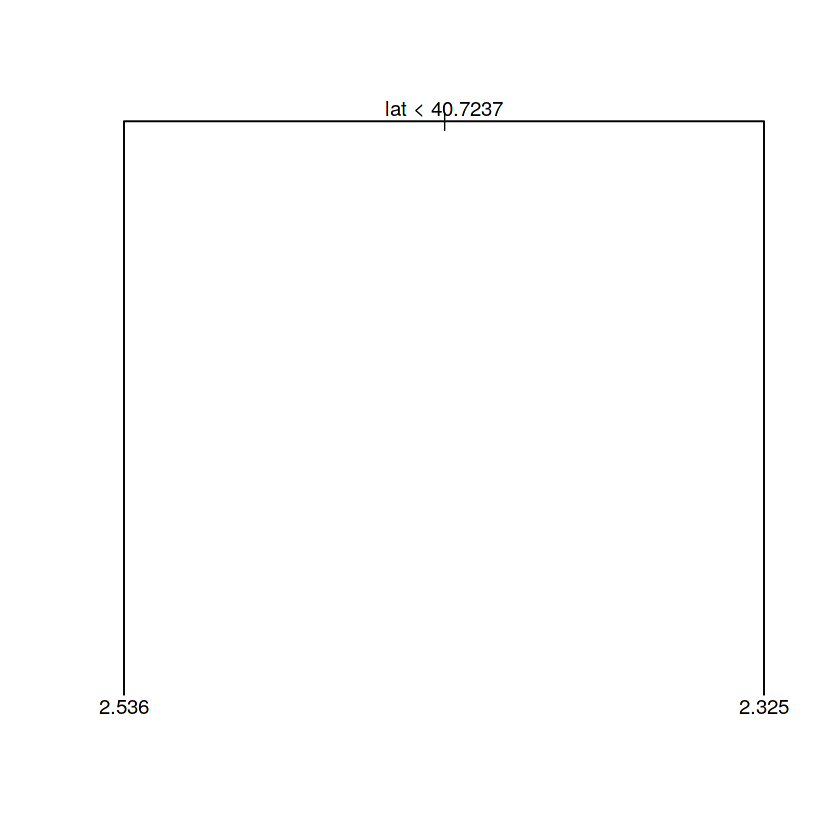

In [23]:
####### Let's try fitting a new regression tree where we include the new time variables.

####### Fitting a tree with total as the outcome and  lat, long, hour, wday, and month as predictors
fitted_tree <- tree(total ~ lat + long + hour + wday + month, data = taxi)




####### Draw a diagram of the tree structure
plot(fitted_tree)
text(fitted_tree)

####### Summarizing the performance of the tree
summary(fitted_tree)

# One tree is not enough

In [24]:
######## The regression tree has not changed after including the three time variables.
######## This is likely because latitude is still the most promising first variable to split the data on, and after that split, the other variables are not informative enough to be included. 
######## A random forest model, where many different trees are fitted to subsets of the data, may well include the other variables in some of the trees that make it up.

########  Loading in the randomForest package
library(randomForest)



######## Fitting a random forest
fitted_forest <- randomForest(total ~ lat + long + hour + wday + month,     #----->Set the following arguments to randomForest() to speed up the computation: ntree = 80 and sampsize = 10000
    data=taxi, ntree=80, sampsize=10000)


######## Printing the fitted_forest object
fitted_forest



randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin





Call:
 randomForest(formula = total ~ lat + long + hour + wday + month,      data = taxi, ntree = 80, sampsize = 10000) 
               Type of random forest: regression
                     Number of trees: 80
No. of variables tried at each split: 1

          Mean of squared residuals: 0.2998666
                    % Var explained: 2.75

# Plotting the predicted fare

In [25]:
######### In the output of fitted_forest , we  should see the Mean of squared residuals, that is, the average of the squared errors the model makes. 
######### Summary of fitted_tree we'll find Residual mean deviance which is the same number. If we compare these numbers, we'll see that fitted_forest has a slightly lower error.
######### Neither predictive model is that good, in statistical terms, they explain only about 3% of the variance.
head(taxi)

medallion,pickup_datetime,long,lat,trip_time_in_secs,fare_amount,tip_amount,total,hour,wday,month
<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<ord>,<ord>
4D24F4D8EF35878595044A52B098DFD2,2013-01-13 10:23:00,-73.94646,40.77273,600,8.0,2.5,2.351375,10,Sun,Jan
A49C37EB966E7B05E69523D1CB7BE303,2013-01-13 04:52:00,-73.99827,40.74041,840,18.0,0.0,2.890372,4,Sun,Jan
1E4B72A8E623888F53A9693C364AC05A,2013-01-13 10:47:00,-73.95346,40.77586,60,3.5,0.7,1.435085,10,Sun,Jan
F7E4E9439C46B8AD5B16AB9F1B3279D7,2013-01-13 11:14:00,-73.98137,40.72473,720,11.5,2.3,2.624669,11,Sun,Jan
A9DC75D59E0EA27E1ED328E8BE8CD828,2013-01-13 11:24:00,-73.96800,40.76000,240,6.5,0.0,1.871802,11,Sun,Jan
19BF1BB516C4E992EA3FBAEDA73D6262,2013-01-13 10:51:00,-73.98502,40.76341,540,8.5,1.7,2.322388,10,Sun,Jan


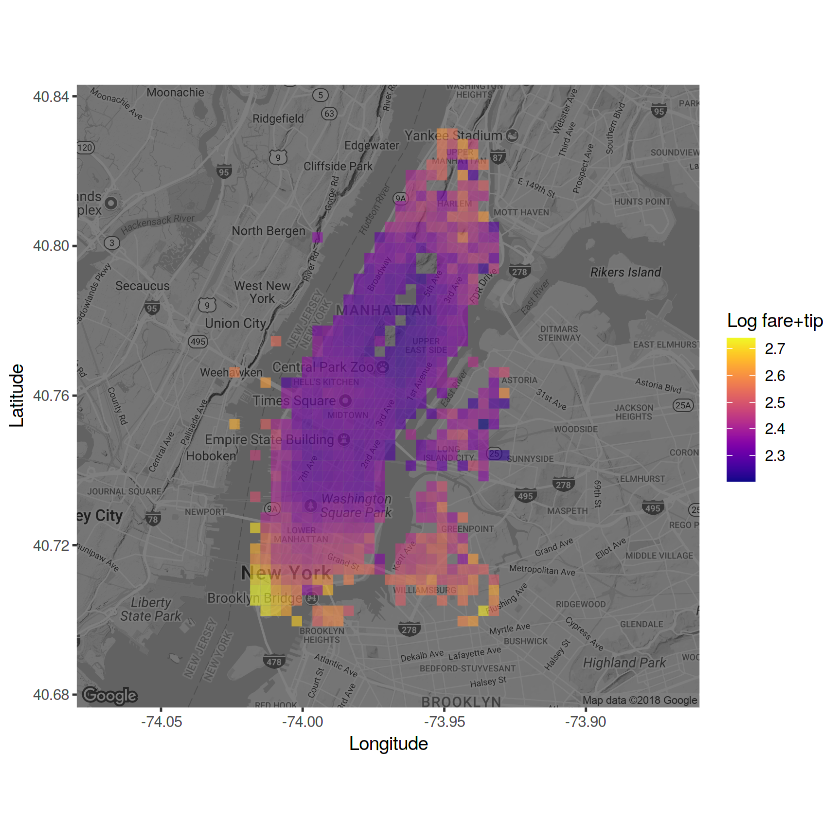

In [27]:
########## Extracting the prediction from forest_fit
taxi$pred_total <- fitted_forest$predicted


########## Plotting the predicted mean trip prices from according to the random forest

ggmap(manhattan, darken=0.5) +
    scale_fill_viridis(option = 'plasma') +
    stat_summary_2d(data=taxi, aes(x = long, y = lat, z = pred_total),       #----->  stat_summary_2d is similar to geom_bin2d but takes the data connected to z and applies a function to it defined by the fun = argument
                    fun = mean, alpha = 0.6, bins = 60) +
    labs(x = 'Longitude', y = 'Latitude', fill = 'Log fare+tip')

# Plotting the actual fare

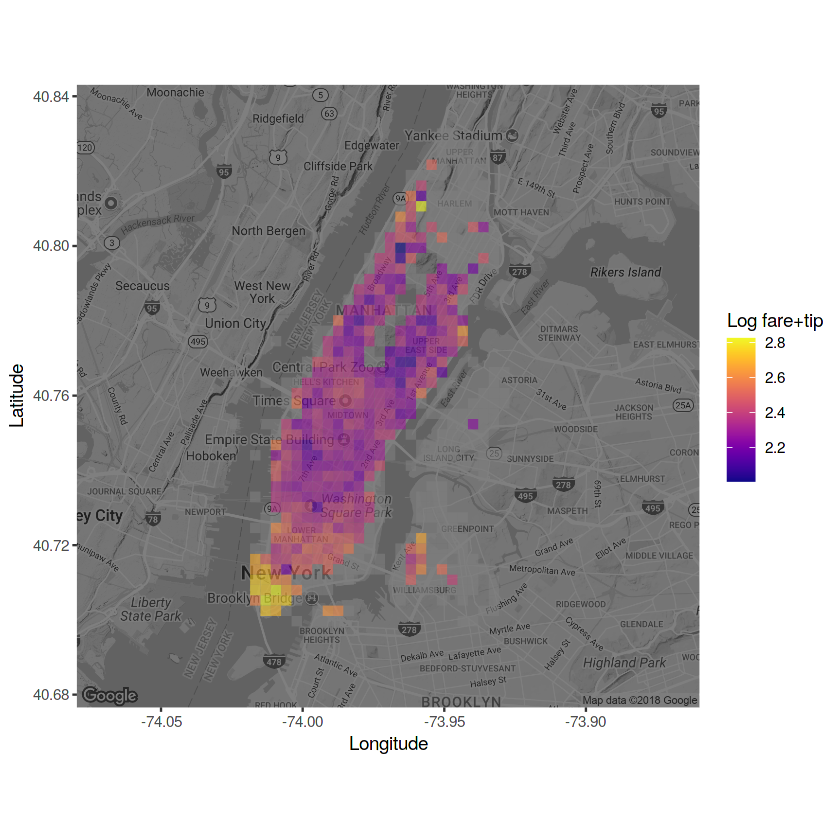

In [35]:
########### Looking at the map with the predicted fares we see that fares in downtown Manhattan are predicted to be high, while midtown is lower.
########### This map only shows the prediction as a function of lat and long
###########  Let's compare the map with the predicted fares with a new map showing the mean fares according to the data.

########### Function that returns the mean *if* there are 15 or more datapoints
mean_if_enough_data <- function(x) {
    ifelse( length(x) >= 15, mean(x), NA)               
}

###########  We could use fun = mean for this plot, but that will leave a lot of squares with just a few data points which will be visually distracting.
########### Therefore we'll use mean_if_enough_data instead which only returns the mean if there are 15 or more datapoints.

############ Plotting the mean trip prices from the data
ggmap(manhattan, darken=0.5) +
    stat_summary_2d(data=taxi, aes(x = long, y = lat, z = total),
                    fun = mean_if_enough_data,
                    alpha = 0.6, bins = 60) +
  scale_fill_viridis(option = 'plasma') +
  labs(x = 'Longitude', y = 'Latitude', fill = 'Log fare+tip')

In [37]:
############ So it looks like the random forest model captured some of the patterns in our data.

############ People would  spend the most on a taxi ride in dowtown of Manhattan in NYC as a last result  

spends_most_on_trips <- "downtown"

In [38]:
write.csv(taxi, file = "prediction_of_taxi_fares.csv", row.names = F)